# <center>TD 2 de morphologie mathématique</center>
# <center>revisited</center>
## <center>Hugues Talbot 15 mars 2019</center>


Quelques indications ont été données sur chacune des questions.
Merci de bien vouloir indiquer votre nom et prénom

NOM Prénom

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


## pour afficher une seule image
def imview(image, cmap="gray"):
    plt.figure(figsize=(4,4))
    plt.imshow(image,cmap=cmap)
    plt.show()
    
## pour afficher plusieurs images l'une à côté de l'autre
def viewlist(images,cmap="gray"):
    plt.figure(figsize=(12,4))
    columns = len(images)
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,cmap=cmap)
    plt.show()

## Section 1:  rappels sur Scikit-image

[Scikit-image](https://scikit-image.org/) est une bibliothèque de traitement d'image similaire en esprit à celle que nous avons crée en cours, mais beaucoup plus rapide. La notion de graphe n'y est pas aussi apparente et le nom des opérateurs est différent.



### Télécharger les images:

In [ ]:
## Telechargement des images
import sys

url="http://perso.esiee.fr/~talboth/ISBS/TP/isbs_images.tar.gz"
filename="isbs_images.tar.gz"
if (sys.version_info.major < 3):
    ## python2 syntax
    import urllib2
    response = urllib2.urlopen(url, timeout = 5)
    content = response.read()
    f = open( filename, 'w' )
    f.write( content )
    f.close()
else:
    ## python3 syntax
    import urllib.request
    # Download the file from `url` and save it locally under `file_name`:
    with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
        data = response.read() # a `bytes` object
        out_file.write(data)
    
!ls -l

In [ ]:
## ouverture de l'archive
!tar xvf isbs_images.tar.gz

### section 1.1: Graphe et connectivité

Jusqu'à présent, nous avons défini la connectivité par un graphe. Dans skimage, nous définissons la connectivité par un *élément structurant*

<IPython.core.display.Javascript object>


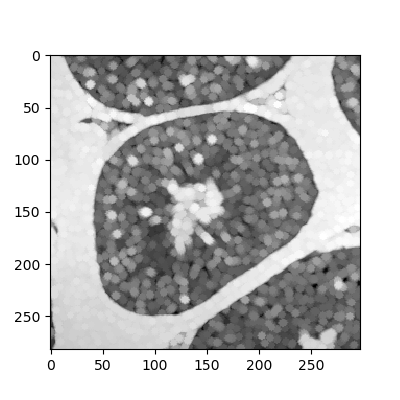

In [2]:
import skimage.io
import skimage.morphology

cell=skimage.io.imread("Images/cell.pgm")
## Generation d'une connectivité sous forme d'un disque de rayon 3
ES1 = skimage.morphology.disk(3)
## dilatation
celldill1 = skimage.morphology.dilation(cell, ES1)
imview(celldill1)

### section 1.2: Rappel des opérateurs vus au TP1



## operateurs de base

- erosion
- dilation
- closing
- opening

## operateur connexes

- reconstruction

### section 1.2 : documentation de skimage

La documentation de skimage est ici, 
[Documentation de skimage](http://scikit-image.org/docs/0.14.x).

Vous pouvez aussi mettre un point d'interrogation avant ou après le nom d'un operateur pour savoir comment il fonctionne:

exemple : `skimage.morphology.erosion?`

In [3]:
## essayez
skimage.morphology.erosion?

## Section 2: exercices
Dans cette section, quelques exercices à terminer si possible avant la fin du TP

### Exercice 2.1: detecter les nombres

Lisez l'image `numbers.pgm` et corriger la variation du fond pour détecter les nombres. 

<IPython.core.display.Javascript object>


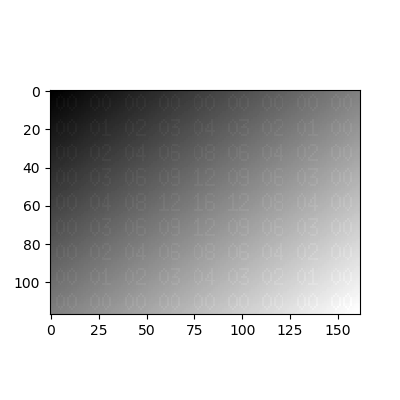

<IPython.core.display.Javascript object>


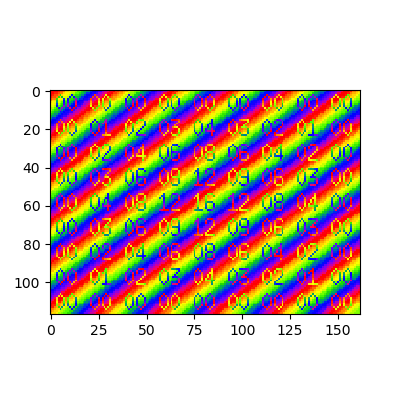

In [4]:
nombres=skimage.io.imread("Images/numbers.pgm")
imview(nombres)
## Les nombrs sont très peu visibles, vous pouvez essayer la colormap "prism" pour peut-être mieux les voir
imview(nombres,"prism")

In [ ]:
## répondre ici

### Exercice 2.2 Globule rouges
Lisez l'image `Images/bloodcells.pgm`. 

- Segmentez et comptez les globules rouges; 
- éliminez ceux qui touchent les bords; 
- séparez ceux qui se touchent; 
- comptez le nombre de globules rouges, et
- affichez un histogramme de leur aire.

**Indications**: 
- évitez de seuiller l'image dès la première étape. 
- La partie claire centrale des globules est caractéristique: voyez si la procédure de bouchage de trous du 1er TP pourraient être étendue aux niveaux de gris.
- Ensuite, essayez de voir si vous pouvez utiliser cette zone centrale comme une indication.
- N'essayez pas d'avoir un résultat parfait.
- N'oubliez pas d'enlever les globules rouges qui touchent le bord.
- Si possible, séparez les globules rouges qui se touchent.

**fonctions utiles**: 
- filtrage (ouverture, fermetures), 
- top-hat (image-ouverture, fermeture-image), 
- reconstruction  
- fonction distance  
- labellisation 
- ligne de partage des eaux 

Pour le comptage et la mesure de l'aire, utilisez les fonctions issues de scikit-image, exemple

```python
import skimage.measure

measures = skimage.measure.regionprops(bcsln)
areas = [measures[i].area for i in range(len(measures))]
plt.figure()
plt.hist(areas[1:])
```

<IPython.core.display.Javascript object>


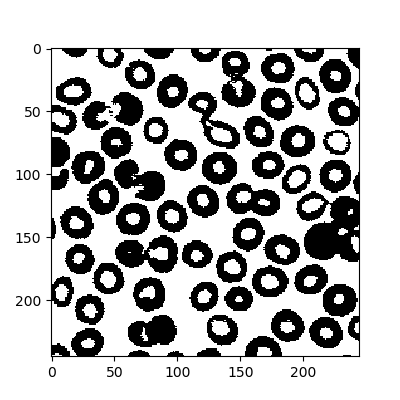

<IPython.core.display.Javascript object>


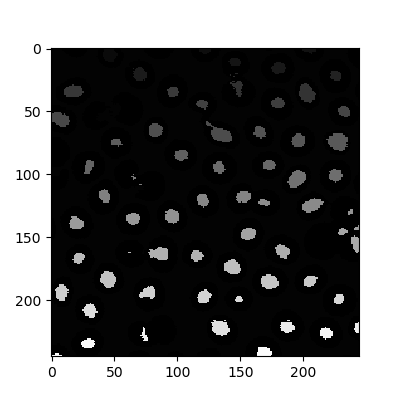

<IPython.core.display.Javascript object>


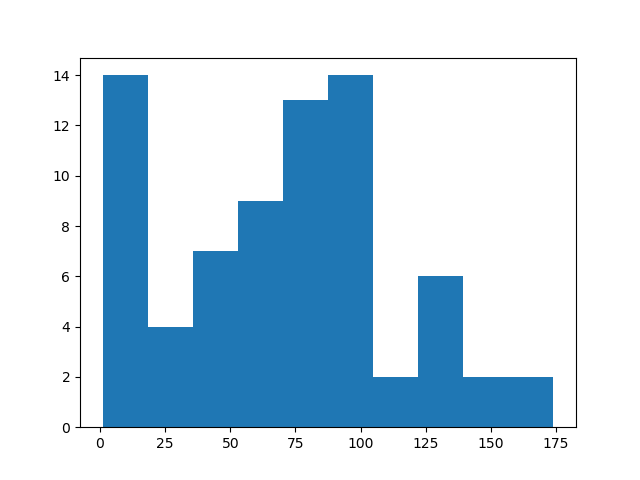

(array([14.,  4.,  7.,  9., 13., 14.,  2.,  6.,  2.,  2.]),
 array([  1. ,  18.3,  35.6,  52.9,  70.2,  87.5, 104.8, 122.1, 139.4,
        156.7, 174. ]),
 <a list of 10 Patch objects>)

In [5]:
import skimage.measure

bloodcells=skimage.io.imread("Images/bloodcells.pgm")

bcs = bloodcells > 120 ## not a proper segmentation !

imview(bcs)

bcsln = skimage.morphology.label(bcs)

imview(bcsln)

#viewlist((bcs,bcsln))

measures = skimage.measure.regionprops(bcsln)
areas = [measures[i].area for i in range(len(measures))]
plt.figure()
plt.hist(areas[1:])

In [ ]:
import skimage.morphology as morpho

def bjseg(img, up, down, lu, ld):
    """
    Boykov-Jolly segmentation
    """
    return

holes = bloodcells > 120
holeslab = skimage.morphology.label(holes)
holesmeas = skimage.measure.regionprops(holeslab)

# external gradient
grad = morpho.dilation(bloodcells,morpho.square(1))-bloodcells


<IPython.core.display.Javascript object>


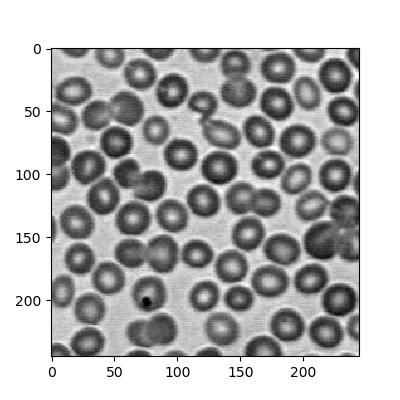

In [6]:
bloodcells=skimage.io.imread("Images/bloodcells.pgm")
imview(bloodcells)

### Exercice 2.3: cellules musculaires

Lire l'image `Images/muscles.pgm`. Segmentez les cellules de muscles, puis 

- éliminez ceux qui touchent les bords; 
- comptez le nombre de cellules, et
- affichez un histogramme de leur aire.

**Indications**
- Ne seuillez pas immédiatement
- Essayez de rehausser les contours blanc des cellules musculaires
- Fonctions utiles:
    - areaopening *(voir doc)*
- Observez que l'intérieur des cellules est plus sombre que leur contour, comme dans une image de gradient. Après rehaussement, essayez de voir si vous pouvez vous en servir, par exemple dans le contexte de la ligne de partage des eaux.

<IPython.core.display.Javascript object>


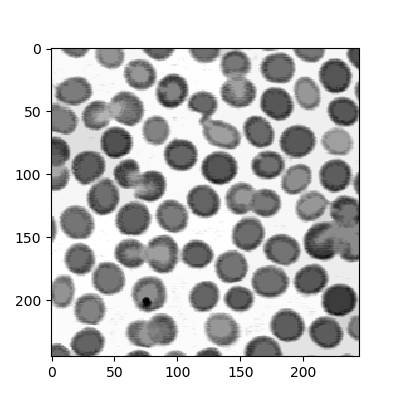

<IPython.core.display.Javascript object>


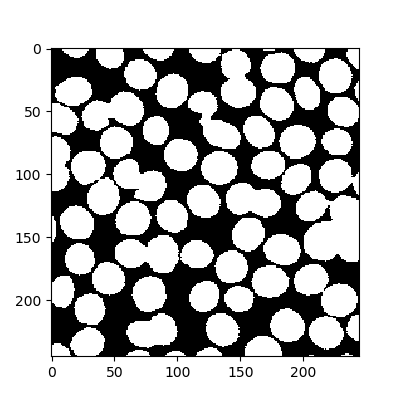

In [11]:
bloodcells_ero = skimage.morphology.erosion(bloodcells,skimage.morphology.disk(8))
bloodcells_rec = skimage.morphology.reconstruction(bloodcells_ero, bloodcells)
imview(bloodcells_rec)
bloodcells_bin = bloodcells_rec < 140
imview(bloodcells_bin)

In [ ]:
bloodcells_ero = skimage.morphology.erosion(bloodcells,skimage.morphology.disk(8))
imview(bloodcells_ero)
bloodcells_recons = skimage.morphology.reconstruction(bloodcells_ero,bloodcells)
imview(bloodcells_recons)

<IPython.core.display.Javascript object>


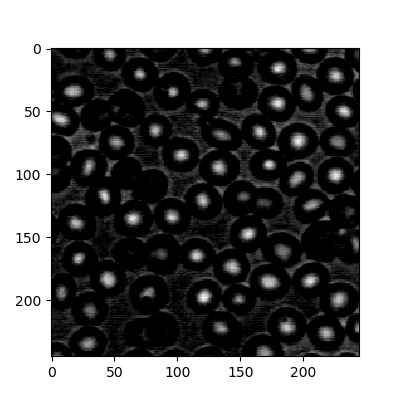

<IPython.core.display.Javascript object>


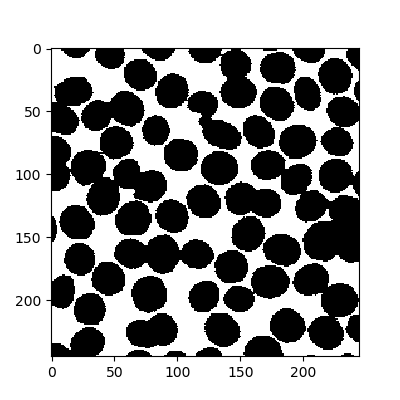

<IPython.core.display.Javascript object>


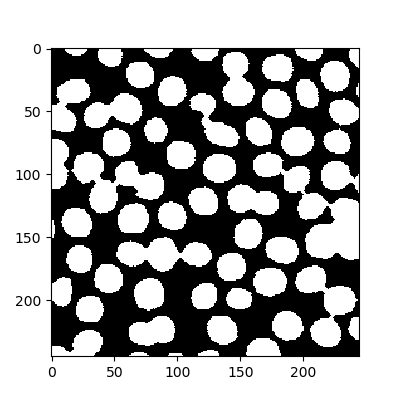

<IPython.core.display.Javascript object>


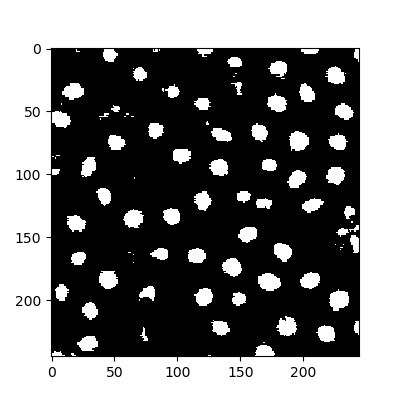

In [78]:
## pas super après seuillage
bc_center = bloodcells - bloodcells_rec
imview(bc_center)
bc_back = bloodcells_rec > 155
imview(bc_back)
bc_backdil = skimage.morphology.dilation(bc_back, skimage.morphology.disk(2))
bc_invback = 1-bc_backdil
imview(bc_invback)
centers = (bc_center > 10) * (bc_invback) 
imview(centers)

<IPython.core.display.Javascript object>


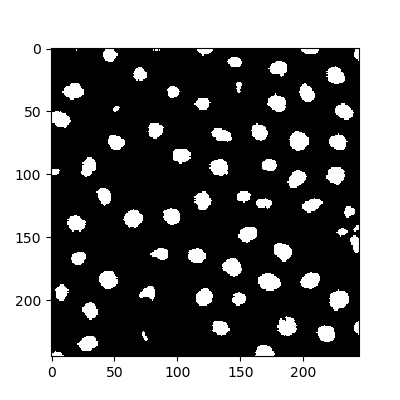

<IPython.core.display.Javascript object>


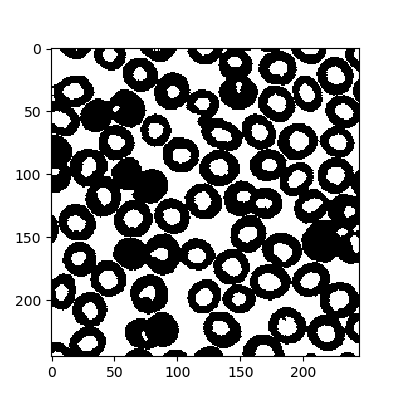

<IPython.core.display.Javascript object>


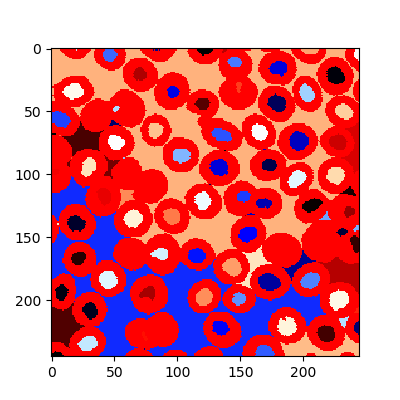

In [79]:
centers_clean = skimage.morphology.opening(centers, skimage.morphology.disk(1))
imview(centers_clean)
bc_back_ero = skimage.morphology.erosion(bc_back, skimage.morphology.disk(1))
binmarkers = centers_clean + bc_back_ero
imview(binmarkers)

markers_labels = skimage.morphology.label(binmarkers)


imview(markers_labels, "flag")
# pas dément

<IPython.core.display.Javascript object>


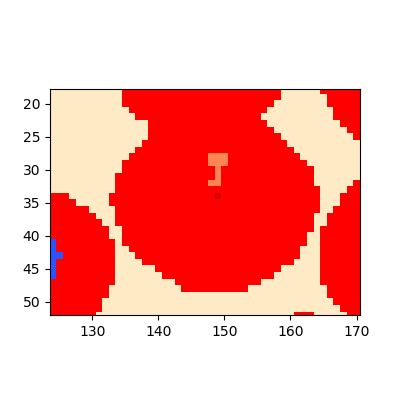

In [40]:
centers_label = skimage.morphology.label(centers_clean)
centers_label1 = center_label + centers_clean ## add +1 to the values of the labels
newmarkers = centers_label1 + bc_back_ero
imview(newmarkers, "flag")

<IPython.core.display.Javascript object>


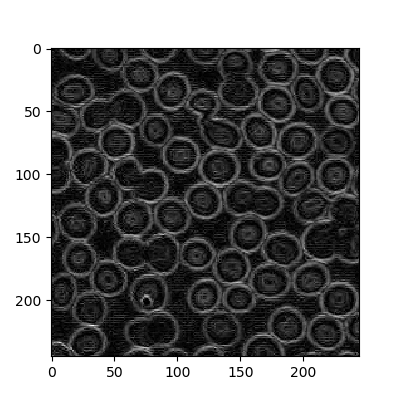

<IPython.core.display.Javascript object>


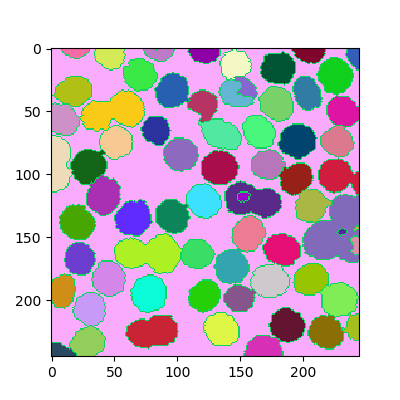

In [76]:
import matplotlib
import matplotlib.colors
import numpy as np

cells_grad = bloodcells-skimage.morphology.erosion(bloodcells, skimage.morphology.disk(1))
imview(cells_grad)
cells_segmentation = skimage.morphology.watershed(cells_grad,newmarkers,watershed_line=True)
##
randcmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
##
imview(cells_segmentation,cmap=randcmap)


In [65]:
myframe = np.zeros((10,10),dtype=np.uint8)
myframe[0:,0]=1
myframe[0:,-1]=1
myframe[0,0:]=1
myframe[-1,0:]=1
myframe

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

<IPython.core.display.Javascript object>


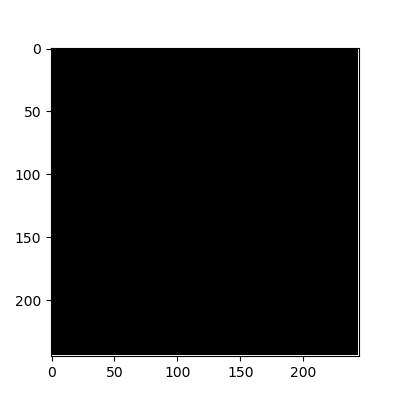

<IPython.core.display.Javascript object>


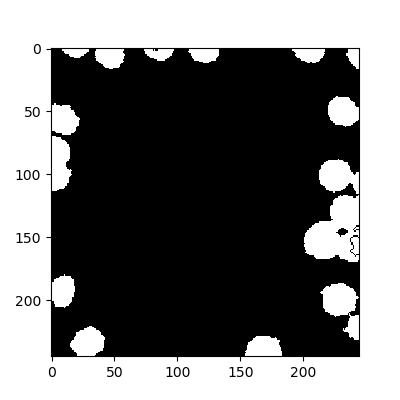

<IPython.core.display.Javascript object>


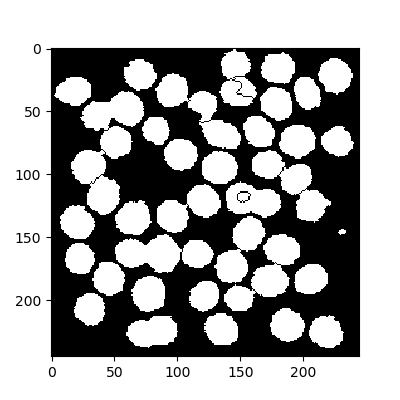

In [80]:
## remove cells that touch the border

seplineval = np.max(cells_segmentation)
bincells=(cells_segmentation > 1) ^ (cells_segmentation == seplineval) 

def frame(image,value=1):
    myframe = np.zeros(image.shape)
    myframe[0:,0]=1
    myframe[0:,-1]=1
    myframe[0,0:]=1
    myframe[-1,0:]=1
    return(myframe)

binf = frame(bincells)
imview(binf)

## 
touch = skimage.morphology.reconstruction(binf*bincells,bincells,selem=skimage.morphology.diamond(1))
imview(touch)
nontouch = bincells-touch
imview(nontouch)

In [ ]:
muscle=skimage.io.imread("Images/muscle.pgm")
imview(muscle)

## Section 3: mini-projet

Le projet est très simple. On considère 3 images, qui sont des images
“angiokits” d’un test biologique, ayant pour but de déterminer si certaines substances ont pour effet ou
non de promouvoir la croissance de cellules endothéliales de vaisseaux sanguins humains. Les cellules sont
cultivées sur un substrat de cellules musculaires, dans une boite de Petri.

Ces substances peuvent entrer dans la composition de médicaments futurs ayant pour effet d’accélérer
la croissance de vaisseaux en cas de blessure, ou bien au contraire de les ralentir pour aider à combattre
certaines tumeurs malignes. Les images sont fournies gracieusement par Sanofi et correspondent à un
problème réel.

### 3.1 : lecture des images

Les images sont situés ici

`Images/projet/vide512.pgm`
`Images/projet/acne512.pgm`
`Images/projet/poils512.pgm`

Les noms sont descriptifs mais n'ont pas de valeur réelle. 

Votre objectif est de produire une fonction qui permet de distinguer les 3 cas: l'image vide est essentiellement une boite de petri où rien n'a poussé. L'image "acne" est une image où la croissance s'est produite de manière compacte, et l'image "poils" où elle s'est produite de manière anisotrope.

On souhaite que vous produisiez une ou plusieurs procédures dont le(s) résultat(s) sont des mesures numériques qui donne des résultats suffisamment différents dans les trois cas pour pouvoir les distinguer. On pourra par exemple penser à des mesures de surfaces, longueurs, etc. Vous devrez justifier vos choix.



In [ ]:
vide=skimage.io.imread("Images/projet/vide512.pgm")
acne=skimage.io.imread("Images/projet/acne512.pgm")
poil=skimage.io.imread("Images/projet/poils512.pgm")

    
viewlist((vide,acne,poil))


### 3.2 : mise en oeuvre

Mettez en oeuvre les mesures que vous avez décrites. En particulier, vous devez produire une fonction Pink/Python qui prend en entrée une image et donne comme résultat le nombre 0 s’il s’agit d’une image vide, le nombre 1 s’il s’agit d’une image « d’acné »et le nombre 2 s’il s’agit d’une image de « poils ».
Votre procédure pourra être testée sur des *images auquelles vous n’avez pas accès*, pour estimer la
robustesse de votre approche. Donnez le détail et le résultat de chaque opération.

** Quelques indications: **

- Ne seuillez pas l'image immédiatement
- Le fond de l'image n'est pas uniforme, corrigez le (vous savez faire !, voir TD fond d'oeil ou première question de ce TP)
- restreignez l'image à la partie où se trouve les vraies données (le puit)
    - par exemple essayez de segmenter le puit (préférable)
        - un seuillage peut marcher
        - eventuellement suivi d'opérateur de filtrage morphologique pour obtenir un masque binaire du puit
        - inutile de trouver les contours du puit précisément.
        - le résultat doit être un masque binaire
    - si vous avez du mal, restreignez l'image à sa partie centrale. Pour ça vous pouvez utiliser les opérateurs de "slicing" de python: exemple
```python
vide=skimage.io.imread("Images/projet/vide512.pgm")
vidsmall = viden[100:400,100:400]
plt.figure()
plt.imshow(vidsmall)
```
- une fois le fond corrigé et l'image restreinte, vous pouvez seuiller, vous avez a le droit ! 
    - essayez les façons de seuiller automatiques [toutes ces méthodes](http://scikitimage.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html) avec scikit-image.
- si vous avez un masque binaire du puit, utilisez le pour ne garder que les objets sur le puit
- labellisez ce que vous donne le seuillage
- utilisez des mesures diverses : surface, périmètre par exemple, mais aussi peut-être nombre d'objet, excentricité ?
- faites divers scatterplots des mesures que vous obtenez pour voir si vous pouvez trouver un ou plusieurs critère de sélection robuste.

In [ ]:
viden=skimage.io.imread("Images/projet/vide512.pgm")
vidsmall = viden[100:400,100:400]

## Soumission

Merci de soumettre votre notebook complété par mail à hugues.talbot@centralesupelec.fr pour le 14/04/2019

Vous pouvez aussi soumettre votre notebook sur Edunao: https://saclay-centralesupelec.edunao.com/course/view.php?id=903